#Imports

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

###1D collision Modelling (basic)

Here, we'll employ the following parameters to vary the collisions:


*   Initial velocity of the two projectiles
*   Coefficient of restitution
*   Masses of each

Some things that we'll output:
*   Position vs Time (For both projectiles) - Graphs + dataset
*   Velocity vs Time (For both projectiles) - Graphs + dataset


The main equations employed:
   $$m_1v_{1i}+m_2v_{2i} = m_1v_{1f}+m_2v_{2f} \quad\text{(conservation of momentum)}$$
   $$e = \frac{v_{2f} - v_{1f}}{v_{ia} - v_{ib}} \quad\text{(coefficient of restitution)}$$

Note that if no additional energy is added, $0\leq e\leq 1$


In [13]:
def single_collision_sim(m_0,m_1,v_0,v_1,restitution):
  p_0 = m_0*v_0+m_1*v_1
  total_mass = m_0+m_1
  rel_vel_0 = v_1-v_0
  v_0 = (p_0 + m_1*restitution*(rel_vel_0))/total_mass
  v_1 = (p_0-m_0*v_0)/m_1
  return (v_0,v_1)

# distance = 15
v_0 = 15
v_1 = 0
m_0 = 15
m_1 = 15
restitution = 0

single_collision_sim(m_0,m_1,v_0,v_1,restitution)



(7.5, 7.5)

### Multiple 1D collisions

Here we'll add in (two) additional parameters:


*   Position of each projectile
*   Time

Instead of having individual variables, we'll have arrays for the initial masses and velocities, respectively. For simplicity, we'll take the coefficient of restitution to be the same everywhere.

**Note**: The hard part might be keeping track of the collisions (discrete time = might overshoot positions!)



In [102]:
positions = [0,1,2,3,4] #For now, we'll make the positions array in increasing order, but we'll have to write an algorithm to implement this later!
velocities = [5,0,0,0,0]
masses = [3,3,3,3,3]
restitution = 1
time = 0
time_delta = 0.01

num_blocks = len(positions)
positions = np.array(positions).astype('float64')
velocities = np.array(velocities).astype('float64')
masses = np.array(masses).astype('float64')
# block_position_data = np.random.normal(0,0,(1,len(positions))).tolist()
# block_vel_data = np.random.normal(0,0,(1,len(velocities))).tolist()

block_position_data = []
block_vel_data = []


def check_collision(position_arr):
  """
  Checks if a collision has occured
  """
  collisions = []
  for i in range(len(position_arr)-1): #inspiration for a circular world here!
      if position_arr[i]>=position_arr[i+1]:
        collisions.append(i)
  return collisions

def update_metrics():
  global positions, velocities, masses, restitution
  #How to account for multiple collisions at once? --> Need some if-else statement for that?
  collisions = check_collision(positions.tolist())
  for i in collisions:
    vel_pair = single_collision_sim(masses[i],masses[i+1],velocities[i],velocities[i+1],restitution)
    velocities[i] = vel_pair[0]
    velocities[i+1] = vel_pair[1]

def simulation_ongoing():
  """
  Checks if there are any more collisions to occur
  """
  for i in range(len(velocities)-1):
    if (velocities[i+1] - velocities[i] < 0):
      return True
  return False

## Running the simulations
counter=0
while (simulation_ongoing()):
  # counter+=1
  block_position_data.append(positions.tolist())
  block_vel_data.append(velocities.tolist())

  update_metrics()
  # print(counter)
  time+= time_delta

  positions += velocities*time_delta






### Multiple 1D Collision Graphs

Here, we'll implement matplot lib libraries to generate some visuals of (x vs t) and (v vs t) for each block.

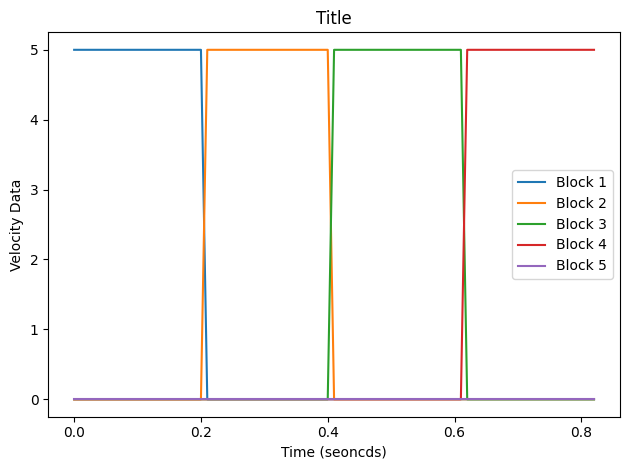

In [106]:
def legend_gen(num):
  legend = []
  for i in range(num):
    legend.append("Block " + str((i+1)))
  return legend

def draw_time_graphs(data, time_delta,y_axis,title="Title", x_axis="Time (seoncds)"):
  datapoints = len(data)
  time_series = []
  for i in range(datapoints):
    time_series.append((i)*time_delta)
  plt.title(title)
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  for i in range(num_blocks):
    plt.plot(time_series, data[:,i])
  plt.legend(legend_gen(num_blocks))
  plt.tight_layout()
  plt.show()
draw_time_graphs(np.array(block_vel_data), time_delta, y_axis="Velocity Data", x_axis="Time (seoncds)")


In [85]:
block_vel_data

array([[5., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 5., 0.]])

In [84]:
block_vel_data = np.array(block_vel_data)
block_vel_data[:,0]

array([5., 5., 5., 0., 0., 0., 0., 0., 0.])

In [21]:
thing = np.array([0,1,2,3,4])
thing[1] = 2
thing[1]


2